# Text Classification : 20 Newsgroups

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_fscore_support
from os import listdir
import re
import matplotlib.pyplot as plt
from tqdm import tqdm
import operator

In [2]:
# Path of folders 
path = r"E:\jupyter\project\textclassification\20_newsgroups"

# Creating a list of folder names to make valid path names later
folders = [f for f in listdir(path)]

# Printing Names Of All 20 Folders
folders

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# Stop Words

In [3]:
stop_words = ["a","the","able","about","data", "about", "above", "above", "across", "after", "afterwards", "again", 
            "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst",
            "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", 
            "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", 
            "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", 
            "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", 
            "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", 
            "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything",
            "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", 
            "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", 
            "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", 
            "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", 
            "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", 
            "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", 
            "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", 
            "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", 
            "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves",
            "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", 
            "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six",
            "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", 
            "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", 
            "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", 
            "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too",
            "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", 
            "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", 
            "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", 
            "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your",
            "yours", "yourself", "yourselves", "the"]

In [4]:
# Creating an empty dictionary for words
dict1 = {}

# Iterating through all files
# Using tqdm module to show the "Progress" bar to track the runtime

for f in tqdm(folders, desc ="Progress"):

    # storing the all documents in a list for a particular file  
    documents=listdir(path+'/'+f)

    # traversing through all documents
    for doc in documents:

        # getting the base path which is common for all documents of a particular file
        path_doc=path+"/"+f+"/"+doc

        # opening the particular document as file object
        with open(path_doc, encoding = "latin-1") as file_obj:
            # reading the document data and converting it inti lowercase and removing the whitespaces
            # using regex finding all words which are alphabets and length of 3 and greater
            file_data = file_obj.read().lower().strip()
            pattern = re.findall(r'\b[a-z]{3,}\b', file_data)

            # Traversing through each word and checking word not in stop words 
            # Storing the word and its frequency in word_dic
            for word in pattern :
                if word not in stop_words:
                    dict1[word]=dict1.get(word,0)+1

Progress: 100%|████████████████████████████████████████████████████████████████████████| 20/20 [03:10<00:00,  9.52s/it]


# Printing length of dictionary and dictionary 

In [5]:
print("Length of Dictionary :",len(dict1))
print(dict1)      

Length of Dictionary : 105943
{'xref': 6064, 'cantaloupe': 26048, 'srv': 32359, 'cmu': 52409, 'edu': 164007, 'alt': 7924, 'atheism': 2563, 'moderated': 58, 'news': 34309, 'answers': 913, 'path': 20369, 'crabapple': 6235, 'andrew': 4458, 'sei': 6201, 'cis': 5752, 'ohio': 15887, 'state': 18842, 'magnus': 1340, 'acs': 1888, 'usenet': 8308, 'ins': 1922, 'cwru': 2732, 'agate': 1827, 'spool': 581, 'uunet': 5369, 'pipex': 759, 'ibmpcug': 109, 'mantis': 625, 'mathew': 426, 'newsgroups': 20404, 'subject': 21589, 'faq': 1065, 'atheist': 406, 'resources': 475, 'summary': 983, 'books': 950, 'addresses': 242, 'music': 481, 'related': 712, 'keywords': 1554, 'fiction': 148, 'contacts': 100, 'message': 21954, 'date': 20787, 'mon': 1937, 'mar': 144, 'gmt': 17773, 'expires': 161, 'thu': 1930, 'apr': 20510, 'followup': 1485, 'distribution': 4753, 'world': 5354, 'organization': 19840, 'consultants': 92, 'cambridge': 470, 'approved': 1322, 'request': 848, 'mit': 3035, 'supersedes': 50, 'lines': 20894, 'arc

# Sorting dictionary on the basis of frequency of words

In [6]:
sorted_dict = dict(sorted(dict1.items(), key=operator.itemgetter(1),reverse=True))
print(len(sorted_dict))
# Sorted dictionary
print(sorted_dict)

105943
{'edu': 164007, 'cmu': 52409, 'com': 50158, 'news': 34309, 'srv': 32359, 'cantaloupe': 26048, 'net': 25459, 'message': 21954, 'subject': 21589, 'lines': 20894, 'date': 20787, 'apr': 20510, 'newsgroups': 20404, 'path': 20369, 'organization': 19840, 'state': 18842, 'gmt': 17773, 'ohio': 15887, 'writes': 14686, 'article': 13435, 'comp': 13101, 'references': 12981, 'talk': 12308, 'misc': 11892, 'ans': 11076, 'sender': 11040, 'howland': 10981, 'reston': 10946, 'don': 10640, 'people': 10364, 'like': 10350, 'just': 9978, 'university': 9958, 'posting': 9793, 'nntp': 9377, 'mps': 9206, 'know': 9173, 'host': 8934, 'sci': 8756, 'think': 8315, 'usenet': 8308, 'zaphod': 8302, 'alt': 7924, 'politics': 7869, 'windows': 7584, 'does': 7267, 'time': 7073, 'rutgers': 7014, 'use': 6959, 'harvard': 6923, 'eng': 6883, 'near': 6868, 'new': 6761, 'rec': 6453, 'good': 6308, 'crabapple': 6235, 'sei': 6201, 'noc': 6191, 'soc': 6168, 'das': 6068, 'xref': 6064, 'cis': 5752, 'europa': 5448, 'gtefsd': 5429, '

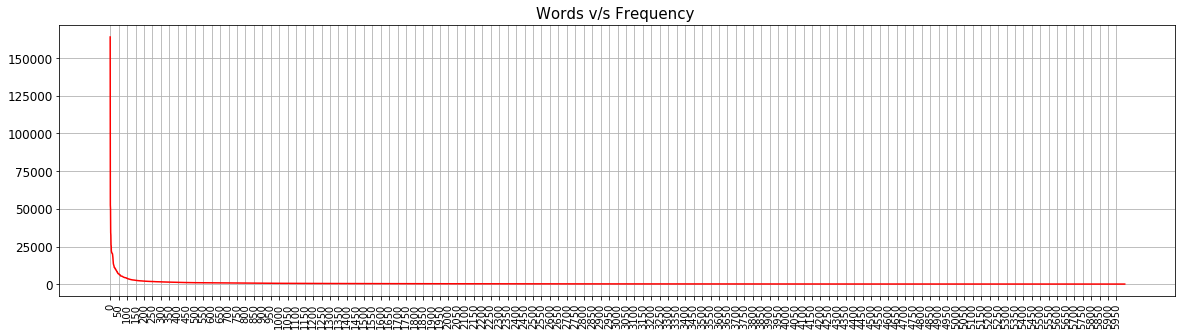

In [7]:
# Creating two list one with words and other with their frequencies
words = [key for key,val in sorted_dict.items()]
freq = [val for key,val in sorted_dict.items()]

# Setting the limit to avoid the least frequencies words
lower_lim = 0   
upper_lim = 6000    

# lower_lim = 0   
# upper_lim = 5000    

# Figure size
plt.figure(figsize=(20, 5))

# Plotting the line graph
plt.plot(np.arange(len(words))[lower_lim:upper_lim],freq[lower_lim:upper_lim],color = 'r')
plt.title("Words v/s Frequency ",size = 15)
plt.xticks(np.arange(lower_lim, upper_lim, 50), rotation= 90,size=10)
plt.yticks(size=12)

plt.grid()
plt.show()

In [8]:
# Considering only first 6000 words
words = words[0:6000]
freq = freq[0:6000]
print("Length of Words : ",len(words))

Length of Words :  6000


In [9]:

# Creating an empty list for dataset
dataset = []

folders = listdir(path)

# Iterating through all files
# Using tqdm module to show the "Progress" bar, to track the runtime

for folder_name in tqdm(folders):
    
    # storing the all documents in a list for a particular file
    documents = listdir(path+"/"+folder_name)

    # traversing through all documents
    for doc in documents :
        
        # Intialising the datapoint with 0 for all the features
        datapt = [0]*len(words)
        
        # getting the base path which is common for all documents of a particular file
        path_doc = path +"/"+folder_name+"/"+doc
        
        # opening the particular document as file object
        with open(path_doc, encoding = "latin-1") as file_obj:
            
            # reading the document data and converting it inti lowercase and removing the whitespaces
            # using regex finding all words which are alphabets and length of 3 and greater
            
            file_data = file_obj.read().lower().strip()
            match_pattern = re.findall(r'\b[a-z]{3,}\b', file_data)

            # Traversing through the tokens
            for word in match_pattern:
               
                # Checking whether the word is present in words list or not 
                if word in words:
                    
                    # Incrementing count of datapoint by 1 if word is present in list
                    
                    datapt[words.index(word)] = datapt[words.index(word)] + 1
        
        # Appending the folder name to datapt and further datapt to dataset list
        datapt.append(folder_name)
        dataset.append(datapt)
print()
print("Length of dataset :",len(dataset))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [12:12<00:00, 36.62s/it]



Length of dataset : 19997


In [10]:
# Naming the class name column as "Class"
words.append("Class")
len(words)

6001

In [11]:
# Creating dataframe and printing the first 10 columns
data_df = pd.DataFrame(dataset,columns = words, index = None)
print(data_df.head(10))
# data_df.describe(include = "all")

   edu  cmu  com  news  srv  cantaloupe  net  message  subject  lines  ...  \
0   10    5    1     4    3           2    2        1        1      2  ...   
1    5    4    1     3    3           2    1        2        2      1  ...   
2    7    3    3     2    2           1    1        1        1      1  ...   
3    6    4    1     1    3           2    1        1        1      1  ...   
4    4    4   10     0    3           2    1        1        1      1  ...   
5    5    3    7     1    2           1    1        1        1      1  ...   
6   13    3    2     0    2           1    2        1        1      1  ...   
7    8    3    1     1    2           1    1        1        1      1  ...   
8    9    3    4     0    2           1    1        1        1      1  ...   
9   14    3    3     1    2           1    2        1        1      1  ...   

   skill  confirm  resolutions  sheep  processors  uniwa  fwi  iris  polygons  \
0      0        0            0      0           0      0    

In [12]:
# Appending dataframe to csv file
data_df.to_csv("text_classification.csv",index=False)

# Implementation of Sklearn Classifier :

In [13]:
# Y is the target class
Y = data_df["Class"]

In [14]:
# X is features 
X = data_df[data_df.columns[:-1]].values

In [15]:
# Splitting the data into training and testing with 75,25 ratio
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.25,random_state=0)

# Multinomial Naive Bayes :

In [16]:
# Creating a classifier object for Multinomial Naive Bayes
clf = MultinomialNB()

# Fitting the classifier object to training data
clf.fit(X_train, Y_train)

# Testing the classifier and storing the predicted classes in Y_pred
Y_pred = clf.predict(X_test)

# Generating the classification report and printing the confusion matrix
print("Classification Report :")
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Classification Report :
                          precision    recall  f1-score   support

             alt.atheism       0.80      0.83      0.82       233
           comp.graphics       0.84      0.83      0.83       253
 comp.os.ms-windows.misc       0.87      0.80      0.83       249
comp.sys.ibm.pc.hardware       0.68      0.83      0.75       240
   comp.sys.mac.hardware       0.80      0.88      0.84       236
          comp.windows.x       0.91      0.76      0.83       240
            misc.forsale       0.83      0.89      0.86       261
               rec.autos       0.93      0.92      0.93       269
         rec.motorcycles       0.93      0.98      0.95       284
      rec.sport.baseball       0.97      0.96      0.96       248
        rec.sport.hockey       0.97      0.99      0.98       231
               sci.crypt       0.97      0.97      0.97       233
         sci.electronics       0.91      0.86      0.88       244
                 sci.med       0.97      0.90      

In [17]:
# Classification report for sklearn classifier , extracting the class names and their respective score
sklearn_classifier = classification_report(Y_test,Y_pred).split("\n")
for i in sklearn_classifier:
  if i == "" :
    sklearn_classifier.remove(i)
# sklearn_classifier[1].split()[-2]
# Storing class name and score in seperate list for plotting
class_name = []
sklearn_score = []
for j in sklearn_classifier[1:-3]:
  class_name.append(j.split()[0])
  sklearn_score.append(float(j.split()[-2]))
# print(class_name)
# print(sklearn_score)

# Implementation of Own Classifier :

# Fit Function

In [18]:
# Fitting the function on training data
def fit(X_train,Y_train):

    """Function
                fit() :
                    Arguments : Training Data (X_train,Y_train)
                    Returns   : Dictionary >>> Keys : Class name and total count of all features
                                               Values : Dictionary >>> Keys : Words and total count of words
                                                                              in current class
                                                                       Values : Frequency of words
                                                                                in current class
    """
    #current_class : Total no. of classes
    # current_values : Total no. of features
    # j : Total no. of possible values for each feature
    
    # Initialising an empty dictionary to store class name and total count of all features
    result = {}

    # Initialising total data as zero
    result["total_data"] = 0

    # All unique class values
    class_values = set(Y_train)

    # Traversing through class values  
    for current_class in class_values:

        # Initialising an empty dictionary for current class
        result[current_class] = {}
        
        # getting the data points which belongs to current class by using a boolean array
        current_class_rows = (Y_train == current_class)
        
        # Storing the features of current class datapoints and
        # target class of current class datapoints
        X_train_current = X_train[current_class_rows]
        Y_train_current = Y_train[current_class_rows]

        # total number of features
        num_features = X_train.shape[1]

        # Initialising the total count for current class as zero
        result[current_class]["total_count"] =0

        # Traversing through each feature
        for j in range(num_features) :

            # Number of time the jth word appeared in current class features  
            result[current_class][j] = X_train_current[:,j].sum()

            # Updating the total count of word
            result[current_class]["total_count"] += result[current_class][j]
        
        # Updating total words of all documents
        result["total_data"] += result[current_class]["total_count"]
        
    return result

# Probability Function

In [19]:
# Finding probablity for a specific class
def probability(dictionary, x, current_class):
    """ Funtion
            probability() :
                Arguments : dictionary (returned from fit function), a data point from X_test, and the class to find the 
                            probablity
                Returns   : probablity of the particular current_class
    """
    
    
    # Calculating the log probablities to avoid the final probablities to approaching zero
    # Using the Multinomial Naive Bayes formula to calculate the probability for a particular class
    output = np.log(dictionary[current_class]["total_count"]) - np.log(dictionary["total_data"])
    
    # Finding the total number of features
    num_features = len(x)
    
    # Traversing through each feature
    for j in range(num_features):
        xj = x[j]
        # Ignoring the features whose value is zero to avoid unnecessary calcualtions
        if x[j]==0:
            continue

        # Using the multinomial Naive Bayes formula to calculate the probablity
        # Also added the Laplace Correction to the formula
        # (Adding '1' to numerator and Adding no. of features to denominator)

        current_class_with_xj = dictionary[current_class][j] + 1
        current_class_total_count = dictionary[current_class]["total_count"] + num_features
        
        # Finding the log probablities
        current_xj_prob = np.log(current_class_with_xj) - np.log(current_class_total_count)

        # Adding to the intial output value to get the final value
        output += current_xj_prob
   
    return output

In [20]:
# Predicting the best class for each data point
def predict_single_point(dictionary, x):

    """ Function 
                 predict_single_point() :
                     Arguments : dictionary (returned from fit function), a data point from X_test
                     Returns   : best predicted class from data point
    """
    # Storing all the class names
    classes = dictionary.keys()

    # Initialising best probability as big negative number
    best_prob = -1000

    # Initialising the best predicted class as -1
    best_class = -1

    # Using boolean to get the class in first time run,in order to get the best class
    first_run = True

    # Traversing through each current class and if current class equals total data then continue
    for current_class in classes :
        if (current_class == "total_data"):
            continue
        
        # Calling Probability function on dictionary from the fit function ,X_test and current class
        p_current_class = probability(dictionary,x,current_class)

        # Checking if the probablity is best from the previous one, if yes then update it otherwise continue
        if (first_run or p_current_class > best_p):
            
            # Updating the best probability and current class
            best_p = p_current_class
            best_class = current_class
        # Changing value of first run to False
        first_run = False


    return best_class

# Predict Function

In [21]:
# Predicting the classes
def predict(dictionary,X_test):

    """Function
                predict() :
                    Arguments : dictionary (returned from fit function), a data point from X_test
                    Returns   : predicted classes
    """
    # Initialsing the list to store best predicted classes
    y_pred = []

    # Traversing through the each data point in testing data 
    for x in tqdm(X_test,desc = "progress") :

        # Predicting the best class for each single point 
        x_class = predict_single_point(dictionary,x)

        # Appending the best predicted classes to the list
        y_pred.append(x_class)
    return y_pred 

In [22]:
# Y_new : target data
Y_new = data_df["Class"]

# X_new : features
X_new = data_df[data_df.columns[:-1]].values

# Splitting the data into training and testing 
X_train_new,X_test_new,Y_train_new,Y_test_new = model_selection.train_test_split(X_new,Y_new,test_size=0.25,random_state=0)


In [23]:
# Fitting the classifier object to training data
dictionary = fit(X_train_new,Y_train_new)

In [24]:
# Testing the classifier and storing the predicted Y_pred_new classes
Y_pred_new = predict(dictionary,X_test_new)

progress: 100%|████████████████████████████████████████████████████████████████████| 5000/5000 [06:24<00:00, 12.99it/s]


In [25]:
# Generating the classification report and printing the confusion matrix
print("Classification Report : ")
print(classification_report(Y_test_new,Y_pred_new))
print(confusion_matrix(Y_test_new,Y_pred_new))

Classification Report : 
                          precision    recall  f1-score   support

             alt.atheism       0.79      0.85      0.82       233
           comp.graphics       0.78      0.85      0.81       253
 comp.os.ms-windows.misc       0.91      0.74      0.81       249
comp.sys.ibm.pc.hardware       0.73      0.90      0.80       240
   comp.sys.mac.hardware       0.86      0.89      0.88       236
          comp.windows.x       0.90      0.81      0.85       240
            misc.forsale       0.87      0.90      0.89       261
               rec.autos       0.95      0.94      0.95       269
         rec.motorcycles       0.97      0.97      0.97       284
      rec.sport.baseball       0.98      0.98      0.98       248
        rec.sport.hockey       0.98      1.00      0.99       231
               sci.crypt       0.97      0.97      0.97       233
         sci.electronics       0.91      0.94      0.93       244
                 sci.med       0.97      0.92     

In [26]:
# Classification report for sklearn classifier , extracting the class names and their respective score
own_classifier = classification_report(Y_test_new,Y_pred_new).split("\n")
for i in own_classifier:
  if i == "" :
    own_classifier.remove(i)
# own_classifier[1].split()[-2]
# Storing class name and score in seperate list for plotting
class_name = []
own_classifier_score = []
for j in own_classifier[1:-3]:
  class_name.append(j.split()[0])
  own_classifier_score.append(float(j.split()[-2]))
# print(class_name)
# print(own_classifier_score)

# Graph Plotting :
#### Bar Plot for Sklearn Classifier :

*   X : Class Name
*   Y : Sklearn Classifier Score

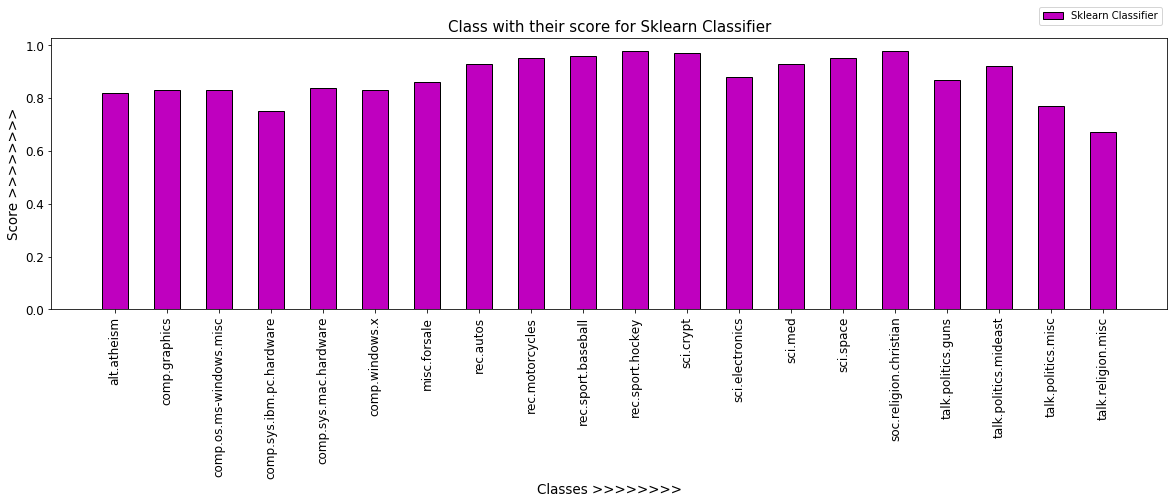

In [27]:
plt.subplots(figsize=(20,5))
plt.bar(class_name,sklearn_score,color = 'm',edgecolor = 'black',width = 0.5,label = "Sklearn Classifier")
plt.xticks(rotation = 90,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Classes >>>>>>>>",fontsize = 13.5)
plt.ylabel("Score >>>>>>>>",fontsize = 13.5)
plt.title("Class with their score for Sklearn Classifier",fontsize = 15)
plt.legend(loc='center right', bbox_to_anchor=(1, 1.08))
plt.show()

# Bar Plot for Own Classifier :

*   X : Class Name
*   Y : Own Classifier Score



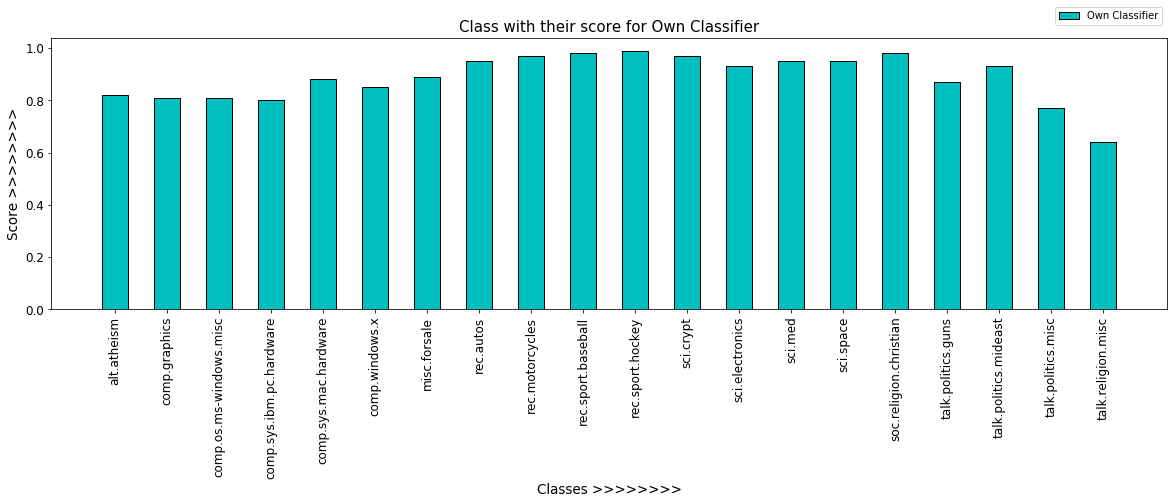

In [28]:
plt.subplots(figsize=(20,5))
plt.bar(class_name,own_classifier_score,color = 'c',edgecolor = 'black',width = 0.5,label = "Own Classifier")
plt.xticks(rotation = 90,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Classes >>>>>>>>",fontsize = 13.5)
plt.ylabel("Score >>>>>>>>",fontsize = 13.5)
plt.title("Class with their score for Own Classifier",fontsize = 15)
plt.legend(loc='center right', bbox_to_anchor=(1, 1.08))
plt.show()

# Sklearn Classifier Vs Own Classifier

*   X : Class Name
*   Y : Own Classifier Score


     Magenta : Sklearn Classifier
     Cyan : Own Classifier



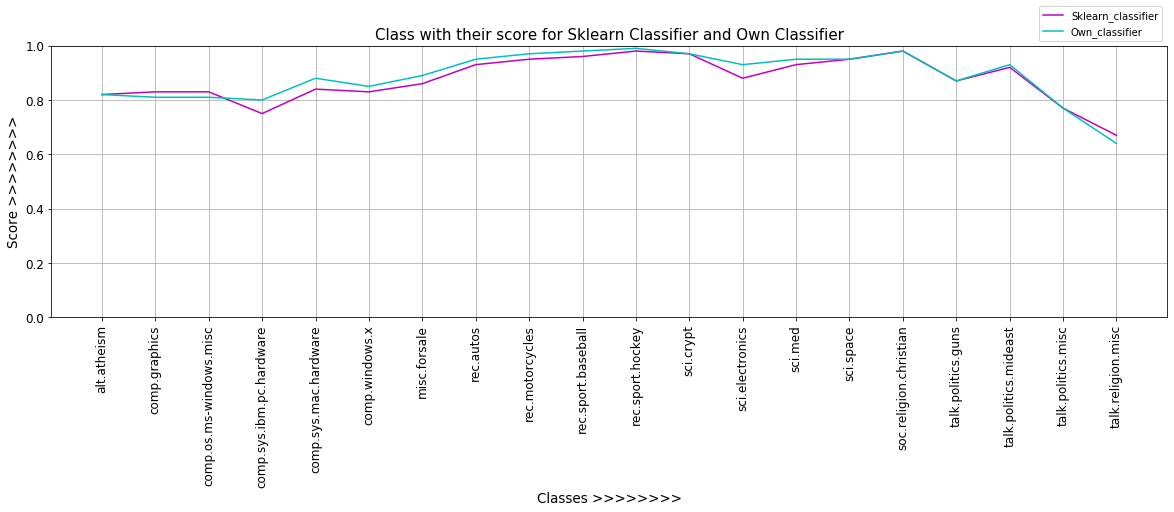

In [29]:
plt.subplots(figsize = (20,5))
plt.plot(class_name,sklearn_score,color ='m',label = 'Sklearn_classifier')
plt.plot(class_name,own_classifier_score,color = 'c',label = 'Own_classifier')
plt.xticks(rotation = 90,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Classes >>>>>>>>",fontsize = 13.5)
plt.ylabel("Score >>>>>>>>",fontsize = 13.5)
plt.title("Class with their score for Sklearn Classifier and Own Classifier",fontsize = 15)
plt.ylim(0,1)
plt.legend(loc='center right', bbox_to_anchor=(1, 1.08))
plt.grid()
plt.show()

# Accuracy Comparison :

In [30]:
# Printing the accuracy for Sklearn classifier and Own classifier
print("Sklearn Classifier Accuracy : ",float(sklearn_classifier[-3].split()[1]))
print("Own Classifier Accuracy : ",float(own_classifier[-3].split()[1]))

Sklearn Classifier Accuracy :  0.88
Own Classifier Accuracy :  0.89


# Conclusion : Accuracy is slightly better in own implementation than SK learn